In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [4]:
import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

In [5]:
nchan, ncur = X.shape
_, nt = Y.shape
nvoxels = ncur/3
print("nchan = %d, ncur = %d, nt = %d , nvoxels = %d"%(nchan,ncur, nt, nvoxels))

nchan = 305, ncur = 22494, nt = 85 , nvoxels = 7498


In [6]:
Xtr,Xts,ytr,yts = train_test_split(X,Y, test_size = 0.33, shuffle = True)

In [7]:
regr = Ridge(alpha = 1)
regr.fit(Xtr,ytr)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
ytrPred = regr.predict(Xtr)
rsq_tr = r2_score(ytr,ytrPred)
print(rsq_tr)
ytsPred = regr.predict(Xts)
rsq_ts = r2_score(yts, ytsPred)
print(rsq_ts)

0.6266105948261262
0.13036109655674016


In [9]:
nalphas = 20
alphas = np.logspace(-2,2, nalphas)
rssts = np.zeros((nalphas,1))
print(alphas)
for i, alph in enumerate(alphas):
    regr = Ridge(alpha = alph)
    regr.fit(Xtr,ytr)
    testPred = regr.predict(Xts)
    rssts[i] = r2_score(yts,testPred)

[1.00000000e-02 1.62377674e-02 2.63665090e-02 4.28133240e-02
 6.95192796e-02 1.12883789e-01 1.83298071e-01 2.97635144e-01
 4.83293024e-01 7.84759970e-01 1.27427499e+00 2.06913808e+00
 3.35981829e+00 5.45559478e+00 8.85866790e+00 1.43844989e+01
 2.33572147e+01 3.79269019e+01 6.15848211e+01 1.00000000e+02]


Maximum R^2: 0.133155


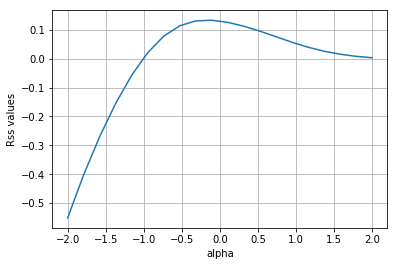

In [13]:
plt.plot(np.log10(alphas),rssts)
plt.grid()
plt.ylabel("Rss values")
plt.xlabel("alpha")
print("Maximum R^2: %f"%(max(rssts)))

In [14]:
iopt = np.argmax(rssts)
alphaopt = alphas[iopt]
regr = Ridge(alpha = alphaopt)
regr.fit(Xtr,ytr)
ytsoptPred = regr.predict(Xts)
W = regr.coef_
W = np.transpose(W)
Wrms = np.zeros((ncur))
Wrms = np.sqrt(np.sum(W**2,axis=1))


In [18]:
alpha_lasso = 1e-3
model = Lasso(alpha = alpha_lasso, max_iter = 100, tol = 0.01)
model.fit(Xtr,ytr)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.01, warm_start=False)

In [41]:
ytsLPred = model.predict(Xts)
rsq_lasso = r2_score(yts, ytsLPred)
print(rsq_lasso)
ytsLPred.shape

0.18450312474471225


(101, 85)

In [47]:
lAphlas = np.logspace(-3,-4,5)
rss_lasso = np.zeros(5)
coeffs = np.zeros((5,nt,ncur))
x,y = yts.shape
ytsPred = np.zeros((5,x,y))
for i, alph in enumerate(lAphlas):
    model = Lasso(alpha = alph, max_iter = 100, tol = 0.01)
    model.fit(Xtr,ytr)
    ytsPred[i] = model.predict(Xts)
    rss_lasso[i] = r2_score(yts,ytsPred[i])
    coeffs[i] = model.coef_



Maximum R^2: 0.276831


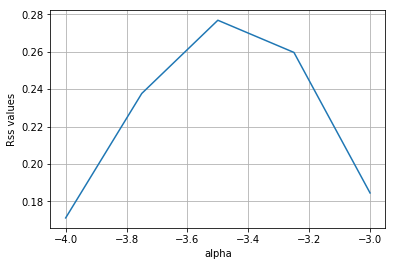

In [48]:
plt.plot(np.log10(lAphlas),rss_lasso)
plt.grid()
plt.ylabel("Rss values")
plt.xlabel("alpha")
print("Maximum R^2: %f"%(max(rss_lasso)))

In [53]:
iopt = np.argmax(rss_lasso)
alphaopt = alphas[iopt]

ytsoptPred = ytsPred[iopt]
W = coeffs[iopt]
W = np.transpose(W)
Wrms = np.zeros((ncur))
Wrms = np.sqrt(np.sum(W**2,axis=1))
print(W)
print(Wrms)

[[ 0.  0.  0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
[0. 0. 0. ... 0. 0. 0.]
